In [ ]:
import matplotlib.pyplot as plt
from tqdm import tqdm
import random 
import copy

#**Random Population**

In [ ]:
def randomPopulation(populationNumber, member, activity, manDay):
    population = []
    for order in range(populationNumber):
        population.append(generatePlanner(member, activity, manDay))
    return population

In [ ]:
def generatePlanner(member, activity, manDay):
    nMember = len(member)
    nActivity = len(activity)
    planner = [[] for i in range(nMember)]
    activityIndex = [activity for activity in range(nActivity)]*(nMember//nActivity)
    for day in range(manDay):
        random.shuffle(activityIndex)
        for person in range(len(member)):
            planner[person].append(activityIndex[person])
    return planner

#**Mutation**

In [ ]:
def mutate(population, activity):
    mutation = []
    for planner in population:
        mutation.append(mutationHelper(planner, activity))
    return mutation

In [ ]:
def mutationHelper(planner, activity):
    nMember = len(planner)
    manDay = len(planner[0])
    mutatedPlanner = copy.deepcopy(planner)
    for day in range(manDay):
        isMutated = bool(random.getrandbits(1))
        if True:
            first = random.randrange(0, nMember)
            second = random.randrange(0, nMember)
            mutatedPlanner[first][day], mutatedPlanner[second][day] = mutatedPlanner[second][day], mutatedPlanner[first][day]
    return mutatedPlanner

#**Cross Over**
Between 2 person

In [ ]:
def crossOver(population):
    nMember = len(population[0])
    manDay = len(population[0][0])
    crossedOver = copy.deepcopy(population)
    endPosition = random.randrange(1, manDay)
    startPosition = random.randrange(0, endPosition)
    for person in range(nMember):
        crossedOver[0][person][startPosition : endPosition] = population[1][person][startPosition : endPosition]
        crossedOver[1][person][startPosition : endPosition] = population[0][person][startPosition : endPosition]
    return crossedOver

#**Selection**

In [ ]:
def select(population, activity):
    uniquePopulation = []
    for i in population:
        if i not in uniquePopulation:
            uniquePopulation.append(i)
    fitness = []
    for planner in uniquePopulation:
        fitnessValue = findFitness(planner, activity)
        fitness.append((fitnessValue, planner))
    fitness.sort()
    return fitness[0], [planner for fitnessValue, planner in fitness[:2]]

In [ ]:
def findFitness(planner, activity):
    activityWeight = 1.5
    meetingWeight = 1
    activityFitness = activityWeight*checkActivityFrequency(planner, activity)
    meetingFitness = meetingWeight*checkMeeting(planner, activity)
    fitnessValue = activityFitness + meetingFitness
    return fitnessValue

In [ ]:
def checkActivityFrequency(planner, activity):
    manDay = len(planner[0])
    nActivity = len(activity)
    bestFrequency = manDay/nActivity
    activityValue = 0
    for individualPlanner in planner:
        individualActivityList = [0 for i in range(nActivity)]
        for day in range(manDay):
            act = individualPlanner[day]
            individualActivityList[act] += 1
        for individualActivity in individualActivityList:
            activityValue += abs(individualActivity - bestFrequency)
    return activityValue

In [ ]:
def checkMeeting(planner, activity):
    nMember = len(planner)
    nActivity = len(activity)
    manDay = len(planner[0])

    nCell = nMember*(nMember - 1)/2
    nMemberPerAct = nMember/nActivity
    nMeeting = nMemberPerAct*(nMemberPerAct - 1)*nActivity*manDay/2
    bestMeetingValue = nMeeting/nCell

    # bestMeetingValue = manDay/nActivity

    filledMeetingTable = fillInMeetingTable(planner, activity)
    meetingValue = 0
    for key, value in filledMeetingTable.items():
        for subKey, subValue in filledMeetingTable[key].items():
            meetingValue += abs(subValue - bestMeetingValue)
    return meetingValue

In [ ]:
def fillInMeetingTable(planner, activity):
    nMember = len(planner)
    nActivity = len(activity)
    manDay = len(planner[0])
    filledMeetingTable = createEmptyMeetingTable(nMember, activity, manDay)
    memberActivityList = []
    for day in range(manDay):
        memberActivityList = [[] for i in range(nActivity)]
        for person in range(nMember):
            act = planner[person][day]
            memberActivityList[act].append(person)
        filledMeetingTable = fillInMeetingTableHelper(filledMeetingTable, memberActivityList)
    return filledMeetingTable

In [ ]:
def createEmptyMeetingTable(nMember, activity, manDay):
    nActivity = len(activity)
    emptyMeetingTable = {person : {remainingPerson : 0 for remainingPerson in range(person+1, nMember)} for person in range(nMember - 1)}
    return emptyMeetingTable

In [ ]:
def fillInMeetingTableHelper(filledMeetingTable, memberActivityList):
    for activity in memberActivityList:
        activity.sort()
        nPeople = len(activity)
        for personIndex in range(nPeople - 1):
            person = activity[personIndex]
            for remainingPersonIndex in range(personIndex + 1, nPeople):
                remainingPerson = activity[remainingPersonIndex]
                filledMeetingTable[person][remainingPerson] += 1
    return filledMeetingTable

#**Main**

In [ ]:
def main(populationNumber, member, activity, manDay):
    population = randomPopulation(populationNumber, member, activity, manDay)
    bestPlanner = (99999, None)
    for round in range(10000):
        mutation = mutate(population, activity)
        crossedOver = crossOver(population)
        challengedPlanner, population = select(population + mutation + crossedOver, activity)
        if challengedPlanner[0] < bestPlanner[0]:
            bestPlanner = challengedPlanner
        if bestPlanner[0] == 0:
            print()
            print("Found Best Planner At round ", round, " : ", bestPlanner, end = "\n")
            return bestPlanner
        if round % 1000 == 0:
            print()
            print(round, bestPlanner, end = "\n")
    return bestPlanner

#**Visualization**

In [ ]:
def visualizeActivityFrezuency(planner, activity, member):
    nMember = len(member)
    differentValue = visualizeActivityFrezuencyHelper(planner, activity)
    nGraph = len(differentValue[0]) - 1
    names = member
    fig = plt.figure(figsize=(20, 5))
    fig.suptitle("Different Activity Frezuency", fontsize=20)
    for graph in range(nGraph):
        index = graph + 1
        values = []
        for person in range(nMember):
            values.append(differentValue[person][index])
        pic = fig.add_subplot(1, nGraph, index)
        pic.set_title("Different = " + "{}".format(index))
        pic.scatter(names, values)
    plt.show()

In [ ]:
def visualizeActivityFrezuencyHelper(planner, activity):
    nMember = len(planner)
    manDay = len(planner[0])
    nActivity = len(activity)
    bestFrequency = round(manDay/nActivity)
    print("bestFrequency = ", bestFrequency)
    differentValue = [[0 for j in range(manDay)] for i in range(nMember)]
    for person in range(nMember):
        individualActivityList = [0 for i in range(nActivity)]
        for day in range(manDay):
            individualPlanner = planner[person]
            act = individualPlanner[day]
            individualActivityList[act] += 1
        for individualActivity in individualActivityList:
            activityValue = abs(individualActivity - bestFrequency)
            differentValue[person][activityValue] += 1
            
    return differentValue

#**Testing Ideal**

In [ ]:
idealPlanner = [[0, 1, 0, 0, 1, 1], 
                [0, 0, 1, 1, 0, 1], 
                [1, 1, 1, 0, 0, 0], 
                [1, 0, 0, 1, 1, 0]]

In [ ]:
member = ["A", "B", "C", "D"]
activity = ["I", "II"]
manDay = 6
populationNumber = 2

In [ ]:
bestPlanner = main(populationNumber, member, activity, manDay)


0 (10.0, [[1, 1, 0, 0, 0, 0], [0, 0, 1, 1, 1, 0], [1, 0, 0, 0, 1, 1], [0, 1, 1, 1, 0, 1]])

Found Best Planner At round  44  :  (0.0, [[0, 1, 0, 1, 0, 1], [1, 0, 1, 0, 0, 1], [0, 1, 1, 0, 1, 0], [1, 0, 0, 1, 1, 0]])


In [ ]:
bestPlanner

(0.0,
 [[0, 1, 0, 1, 0, 1],
  [1, 0, 1, 0, 0, 1],
  [0, 1, 1, 0, 1, 0],
  [1, 0, 0, 1, 1, 0]])

In [ ]:
visualizeActivityFrezuencyHelper(idealPlanner, activity)

bestFrequency =  3


[[2, 0, 0, 0, 0, 0],
 [2, 0, 0, 0, 0, 0],
 [2, 0, 0, 0, 0, 0],
 [2, 0, 0, 0, 0, 0]]

bestFrequency =  3


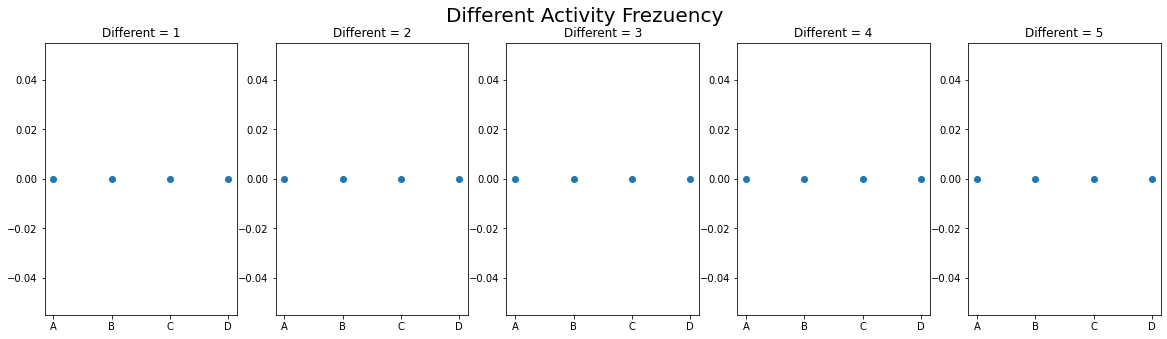

In [ ]:
visualizeActivityFrezuency(idealPlanner, activity, member)

In [ ]:
findFitness(idealPlanner, activity)

0.0

In [ ]:
fillInMeetingTable(bestPlanner[1], activity)

{0: {1: 2, 2: 2, 3: 2}, 1: {2: 2, 3: 2}, 2: {3: 2}}

#**Testing Real World**

In [ ]:
# member = ["A", "B", "C", "D", "E", "F", "G", "H", "I"]
# activity = ["I", "II", "III"]
# manDay = 5
# populationNumber = 2

In [ ]:
member = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X"]
activity = ["I", "II", "III", "IV"]
manDay = 10
populationNumber = 2

In [ ]:
len(member)

24

In [ ]:
bestPlanner = main(populationNumber, member, activity, manDay)


0 (452.760869565217, [[3, 3, 2, 2, 2, 2, 0, 1, 1, 3], [3, 1, 2, 3, 3, 1, 1, 2, 1, 0], [0, 1, 3, 2, 2, 0, 0, 3, 1, 0], [1, 0, 1, 1, 0, 2, 3, 2, 3, 3], [3, 1, 0, 0, 3, 0, 1, 3, 1, 0], [0, 3, 2, 2, 0, 1, 2, 0, 1, 0], [3, 2, 3, 1, 2, 2, 0, 3, 3, 1], [1, 2, 1, 0, 2, 0, 1, 1, 1, 1], [0, 3, 2, 3, 2, 3, 3, 0, 3, 3], [2, 1, 3, 2, 1, 3, 0, 2, 2, 3], [2, 2, 2, 2, 0, 2, 3, 1, 0, 1], [2, 1, 3, 3, 3, 3, 2, 2, 2, 3], [1, 0, 1, 0, 0, 1, 2, 2, 3, 3], [2, 0, 2, 1, 3, 2, 2, 3, 2, 2], [1, 0, 3, 2, 0, 1, 3, 0, 2, 2], [1, 2, 1, 1, 0, 0, 1, 1, 2, 2], [2, 0, 0, 1, 1, 3, 2, 3, 2, 1], [1, 1, 0, 3, 2, 0, 1, 0, 0, 2], [0, 3, 1, 1, 1, 2, 2, 0, 0, 2], [3, 3, 1, 3, 3, 3, 3, 2, 0, 2], [0, 2, 3, 3, 1, 1, 0, 3, 3, 1], [2, 0, 0, 0, 1, 3, 3, 1, 0, 0], [0, 3, 0, 0, 3, 0, 1, 1, 3, 1], [3, 2, 0, 0, 1, 1, 0, 0, 0, 0]])

1000 (327.10869565217354, [[3, 3, 0, 0, 1, 3, 1, 1, 1, 2], [1, 1, 2, 0, 1, 0, 3, 3, 2, 2], [0, 3, 3, 1, 2, 0, 1, 0, 0, 2], [0, 2, 1, 0, 2, 2, 0, 1, 1, 3], [0, 1, 0, 3, 0, 1, 1, 2, 3, 3], [3, 3, 2, 2, 0, 1, 1

In [ ]:
bestPlanner

(294.3260869565215,
 [[3, 3, 0, 0, 2, 3, 1, 1, 1, 2],
  [1, 1, 2, 0, 1, 0, 3, 3, 2, 2],
  [3, 2, 3, 1, 1, 1, 1, 0, 0, 2],
  [0, 2, 1, 0, 2, 2, 0, 3, 1, 3],
  [0, 1, 0, 3, 0, 0, 1, 2, 3, 3],
  [3, 2, 2, 2, 0, 0, 1, 3, 0, 1],
  [0, 3, 3, 1, 0, 1, 2, 0, 2, 3],
  [1, 0, 1, 0, 0, 2, 2, 3, 0, 0],
  [1, 3, 2, 3, 2, 2, 3, 0, 1, 3],
  [2, 1, 3, 0, 3, 2, 1, 0, 2, 1],
  [2, 0, 2, 1, 1, 3, 0, 1, 2, 3],
  [0, 1, 3, 2, 2, 3, 3, 2, 0, 0],
  [0, 2, 1, 2, 3, 1, 0, 0, 3, 2],
  [3, 0, 3, 2, 2, 0, 0, 1, 3, 1],
  [3, 3, 2, 1, 1, 2, 0, 2, 3, 0],
  [2, 0, 1, 1, 0, 3, 3, 2, 1, 1],
  [1, 2, 0, 2, 1, 3, 3, 0, 3, 0],
  [2, 1, 0, 1, 3, 3, 2, 3, 0, 1],
  [3, 3, 1, 3, 3, 0, 2, 2, 1, 0],
  [0, 3, 0, 3, 1, 1, 2, 3, 2, 1],
  [1, 2, 3, 3, 3, 2, 1, 1, 2, 0],
  [2, 0, 2, 2, 2, 1, 2, 1, 3, 3],
  [2, 1, 1, 3, 0, 0, 3, 1, 1, 2],
  [1, 0, 0, 0, 3, 1, 0, 2, 0, 2]])

In [ ]:
visualizeActivityFrezuencyHelper(bestPlanner[1], activity)

bestFrequency =  2


[[2, 2, 0, 0, 0, 0, 0, 0, 0, 0],
 [2, 2, 0, 0, 0, 0, 0, 0, 0, 0],
 [3, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 [2, 2, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 2, 1, 0, 0, 0, 0, 0, 0, 0],
 [2, 2, 0, 0, 0, 0, 0, 0, 0, 0],
 [2, 2, 0, 0, 0, 0, 0, 0, 0, 0],
 [2, 1, 0, 1, 0, 0, 0, 0, 0, 0],
 [1, 2, 1, 0, 0, 0, 0, 0, 0, 0],
 [2, 2, 0, 0, 0, 0, 0, 0, 0, 0],
 [2, 2, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 4, 0, 0, 0, 0, 0, 0, 0, 0],
 [2, 2, 0, 0, 0, 0, 0, 0, 0, 0],
 [2, 2, 0, 0, 0, 0, 0, 0, 0, 0],
 [2, 2, 0, 0, 0, 0, 0, 0, 0, 0],
 [3, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 [2, 2, 0, 0, 0, 0, 0, 0, 0, 0],
 [2, 2, 0, 0, 0, 0, 0, 0, 0, 0],
 [3, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 [2, 2, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 4, 0, 0, 0, 0, 0, 0, 0, 0],
 [2, 1, 0, 1, 0, 0, 0, 0, 0, 0],
 [3, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 [2, 1, 0, 1, 0, 0, 0, 0, 0, 0]]

bestFrequency =  2


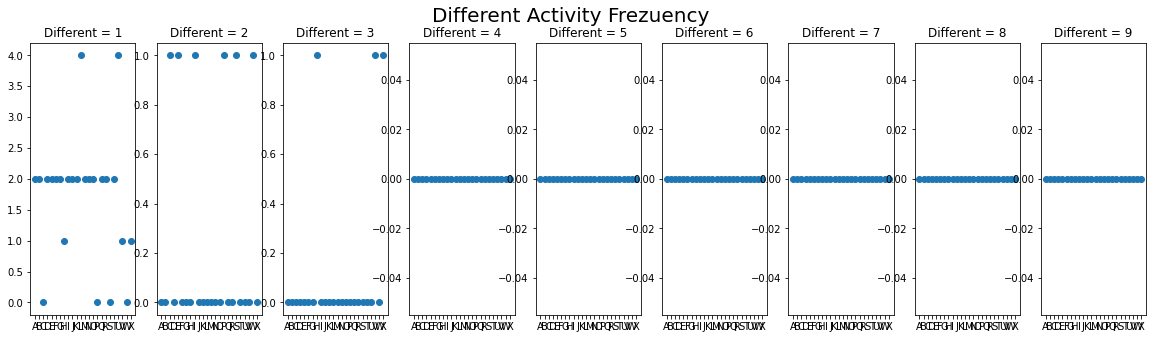

In [ ]:
visualizeActivityFrezuency(bestPlanner[1], activity, member)